In [44]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [45]:
data = pd.read_csv(r"C:\Documents\IBM\Flask App\IBM Dataset.csv")
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


# Data Analysis

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [47]:
data.shape

(11231, 26)

# Handling Missing Values

In [48]:
data.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [49]:
data.dropna()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25


In [50]:
data.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [51]:
data['ARR_TIME'] = np.where(data['ARR_TIME'].isnull(),data['CRS_ARR_TIME'], data['ARR_TIME']) 

In [52]:
data.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                   0
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [53]:
data['DEP_DELAY'] = np.where(data['DEP_DELAY'].isnull(),0, data['DEP_DELAY']) 

# Data Visualisation

In [54]:
# sns.scatterplot(data['ARR_DELAY'], data['ARR_DEL15'])
# #sns.scatterplot(x = 'ARR_DELAY', y = 'ARR_DEL15', data = flight_data)

In [55]:
#sns.catplot(data['ARR_DEL15'], data['ARR_DELAY'], kind = 'bar', data = data)

C:\Users\spars\AppData\Local\Temp\ipykernel_5824\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

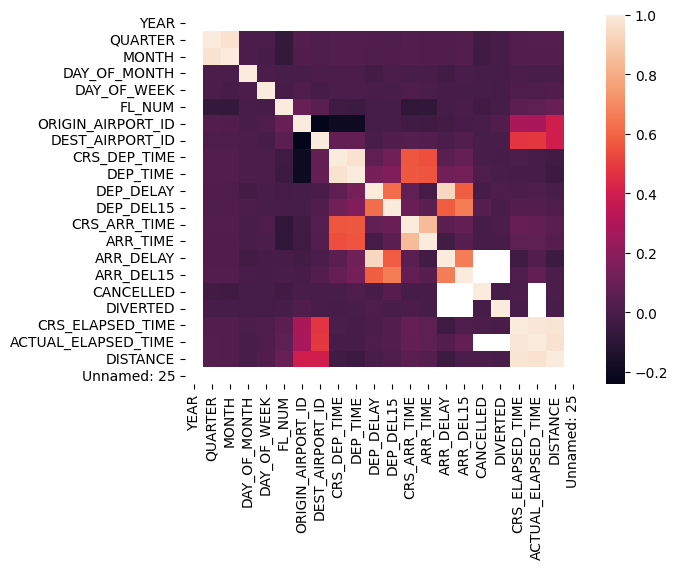

In [56]:
sns.heatmap(data.corr())

### Dropping unnecessary columns

In [57]:
data = data[['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST', 'CRS_ARR_TIME',  'DEP_DEL15', 'ARR_DEL15']]

In [58]:
data.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64

### Missing Values Handling

In [59]:
# data = data.fillna({'DEP_TIME':1})
# data = data.fillna({'ARR_TIME':1})
data = data.fillna({'ARR_DEL15':1})
data = data.fillna({'DEP_DEL15':0})
#data = data.fillna({'ACTUAL_ELAPSED_TIME':1})
data.iloc[150:170]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
150,589,1,8,5,MSP,SEA,1100,0.0,0.0
151,744,1,8,5,MSP,ATL,1334,1.0,0.0
152,784,1,8,5,ATL,MSP,1040,0.0,0.0
153,840,1,8,5,MSP,DTW,2234,0.0,0.0
154,945,1,8,5,DTW,ATL,1555,1.0,1.0
155,987,1,8,5,SEA,DTW,615,0.0,0.0
156,1107,1,8,5,ATL,SEA,2205,0.0,0.0
157,1145,1,8,5,ATL,DTW,1824,0.0,0.0
158,866,1,9,6,ATL,MSP,1538,0.0,0.0
159,976,1,9,6,ATL,JFK,1211,0.0,0.0


In [60]:
import math
for index, row in data.iterrows():
     data.loc[index, 'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME'] / 100)

In [61]:
data.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


# Encoding

In [62]:
le = LabelEncoder()
data['DEST'] = le.fit_transform(data['DEST'])
data['ORIGIN'] = le.fit_transform(data['ORIGIN'])
data.head(5)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


# Splitting the dataset into X and Y

In [63]:
data = pd.get_dummies(data, columns = ['ORIGIN', 'DEST'])

In [64]:
data.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1399,1,1,5,21,0.0,0.0,1,0,0,0,0,0,0,0,0,1
1,1476,1,1,5,14,0.0,0.0,0,1,0,0,0,0,0,0,1,0
2,1597,1,1,5,12,0.0,0.0,1,0,0,0,0,0,0,0,0,1
3,1768,1,1,5,13,0.0,0.0,0,0,0,0,1,0,0,0,1,0
4,1823,1,1,5,6,0.0,0.0,0,0,0,0,1,0,1,0,0,0


In [65]:
x = data.iloc[:, 0:16].values
y = data.iloc[:, 16:17].values

In [66]:
ohe = OneHotEncoder()
z = ohe.fit_transform(x[:,4:5]).toarray()
z
t = ohe.fit_transform(x[:,5:6]).toarray()

In [67]:
x.shape

(11231, 16)

In [68]:
y.shape

(11231, 1)

# Splitting into Train and Test

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [70]:
x_train.shape

(8984, 16)

In [71]:
y_train.shape

(8984, 1)

In [72]:
x_test.shape

(2247, 16)

In [73]:
y_test.shape

(2247, 1)

In [74]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [76]:
dt = dtc.predict(x_test)
dt

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [77]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, dt)
acc

1.0

# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x_train, y_train)

c:\Users\spars\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [79]:
pred_test = lor.predict(x_test)
pred_test

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [80]:
accuracy_score(pred_test, y_test)

1.0

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc_model = RandomForestClassifier(n_estimators=100, random_state=50)
rfc_model.fit(x_train,y_train)

C:\Users\spars\AppData\Local\Temp\ipykernel_5824\2623879972.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(x_train,y_train)


RandomForestClassifier(random_state=50)

In [83]:
rfc_model.score(x_test, y_test)

1.0

In [84]:
pred_test_rf = rfc_model.predict(x_test)
pred_test_rf

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [85]:
accuracy_score(pred_test_rf, y_test)

1.0

# SVM

In [86]:
import pickle
pickle.dump(dtc, open('flight.pkl', 'wb'))